# Testing methods of denoising

## Gaussian and Median

[[0.00026475 0.00140172 0.00381028 0.00531767 0.00381028 0.00140172
  0.00026475]
 [0.00140172 0.00742141 0.02017349 0.02815437 0.02017349 0.00742141
  0.00140172]
 [0.00381028 0.02017349 0.05483722 0.07653151 0.05483722 0.02017349
  0.00381028]
 [0.00531767 0.02815437 0.07653151 0.10680833 0.07653151 0.02815437
  0.00531767]
 [0.00381028 0.02017349 0.05483722 0.07653151 0.05483722 0.02017349
  0.00381028]
 [0.00140172 0.00742141 0.02017349 0.02815437 0.02017349 0.00742141
  0.00140172]
 [0.00026475 0.00140172 0.00381028 0.00531767 0.00381028 0.00140172
  0.00026475]]


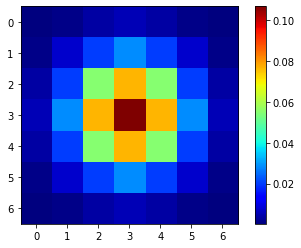

In [4]:
### What is gaussian Kernel #####
import numpy 
from matplotlib import pyplot as plt

def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()
 

gaussian_kernel_array = gaussian_kernel(3)
print(gaussian_kernel_array)
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

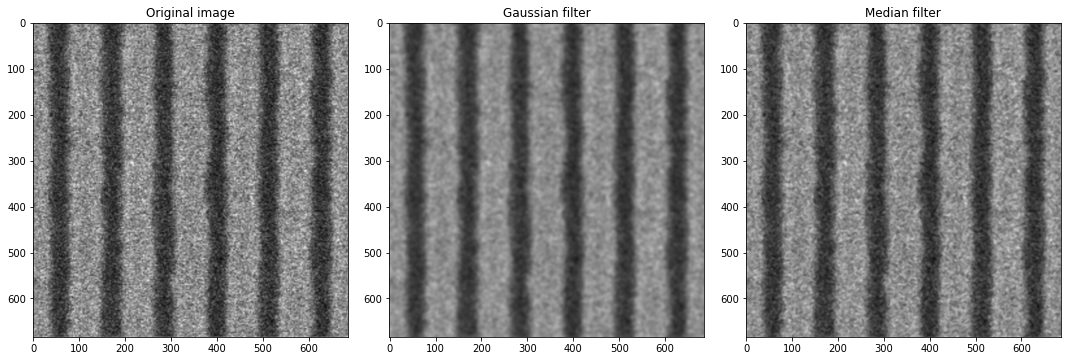

In [21]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
from matplotlib import pyplot as plt
from skimage import io
import numpy as np
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(15,15))
img = img_as_float(io.imread("./data/line_space_noisy.jpg"))
fig.tight_layout()
#Need to convert to float as we will be doing math on the array

ax1.set_title("Original image")
ax1.imshow(img)

from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
#plt.imsave("images/gaussian.jpg", gaussian_img)

ax2.set_title("Gaussian filter")
ax2.imshow(gaussian_img)

median_img = nd.median_filter(img, size=5)
#plt.imsave("images/median.jpg", median_img)

ax3.set_title("Median filter")
ax3.imshow(median_img)

